In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import Conv2D
from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.python.keras.layers import Flatten
from tensorflow.python.keras.layers import ZeroPadding2D
from tensorflow.python.keras.layers import Activation, Dropout
from tensorflow.python.keras.layers.normalization import BatchNormalization
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

In [0]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [39]:
print(X_train.shape)
X_test.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

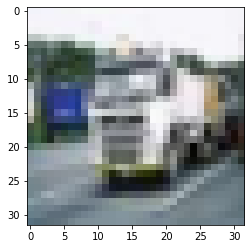

In [40]:
plt.imshow(X_train[1000])

In [0]:
X_train = X_train.reshape(50000, 32, 32, 3) #reshaping the data for the CNN model 
X_test = X_test.reshape(10000, 32, 32, 3)


Y_train = to_categorical(Y_train, 10)      # one hot encoding of traing data label 
Y_test = to_categorical(Y_test, 10)        # one hot encoding of test data label 
     
X_train = X_train/255                      #Normalization of training and test data
X_test = X_test/255

In [42]:
Y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [49]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (32, 32, 3)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 8, 8, 256)        

In [0]:
#model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.compile(keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile(RMSprop(lr = 0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
history = model.fit(X_train, Y_train, epochs = 10, validation_split= 0.1, batch_size = 128, verbose = 2, shuffle= 1)

Epoch 1/10
352/352 - 7s - loss: 2.0328 - accuracy: 0.2031 - val_loss: 1.7126 - val_accuracy: 0.3428
Epoch 2/10
352/352 - 7s - loss: 1.4863 - accuracy: 0.4418 - val_loss: 1.2528 - val_accuracy: 0.5440
Epoch 3/10
352/352 - 7s - loss: 1.0998 - accuracy: 0.6016 - val_loss: 1.0321 - val_accuracy: 0.6464
Epoch 4/10
352/352 - 7s - loss: 0.8885 - accuracy: 0.6818 - val_loss: 0.8266 - val_accuracy: 0.7114
Epoch 5/10
352/352 - 7s - loss: 0.7430 - accuracy: 0.7390 - val_loss: 0.7868 - val_accuracy: 0.7386
Epoch 6/10
352/352 - 7s - loss: 0.6283 - accuracy: 0.7797 - val_loss: 0.7268 - val_accuracy: 0.7520
Epoch 7/10
352/352 - 7s - loss: 0.5328 - accuracy: 0.8142 - val_loss: 0.6950 - val_accuracy: 0.7788
Epoch 8/10
352/352 - 7s - loss: 0.4390 - accuracy: 0.8470 - val_loss: 0.7231 - val_accuracy: 0.7768
Epoch 9/10
352/352 - 7s - loss: 0.3610 - accuracy: 0.8742 - val_loss: 0.7308 - val_accuracy: 0.7780
Epoch 10/10
352/352 - 7s - loss: 0.3111 - accuracy: 0.8904 - val_loss: 0.7630 - val_accuracy: 0.7684

In [46]:
scores = model.evaluate(X_test, Y_test, verbose=0)                     #testing the model with test data
#print(scores)
print("score = ", scores[0])
print("accuracy =  ", scores[1])

score =  0.8009107112884521
accuracy =   0.7850000262260437
score =  0.7926926016807556
accuracy =   0.7789999842643738


Text(0.5, 0, 'epoch')

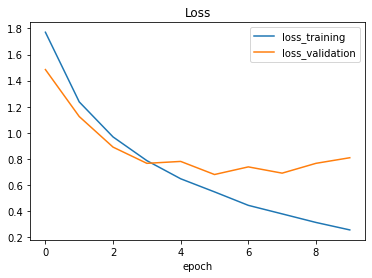

Text(0.5, 0, 'epoch')

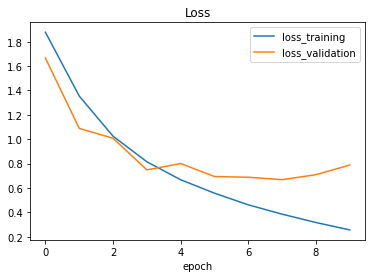

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss_training', 'loss_validation'])
plt.title('Loss')
plt.xlabel('epoch')

#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.legend(['accuracy_training','accuracy_validation'])
#plt.title('Accuracy')
#plt.xlabel('epoch')